**Практическая работа №1. Алгоритм k ближайших соседей.**

На вход поступает обучающая выборка из точек и номеров кластеров.

Необходимо написать алгоритм, при котором при введении новой точки можно определить при количестве k-ближайших соседей принадлежность к конкретному кластеру.

Необходимо построить карту классификации для точек, не входящих в обучающую выборку, для демонстрации корректной работы алгоритма.

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import requests

response = requests.get("https://raw.githubusercontent.com/zhenyachess/artificial_intelligence_methods/main/1/iris.json")
convert = np.array(response.json())

def dist(x1, y1, x2, y2):
  return (abs(x1-x2)**2 + abs(y1-y2)**2)**0.5


def predict_k(x, y, k, lst):
  t = sorted([[dist(x, y, lst[i][0], lst[i][1]), value[-1]] for i, value in enumerate(lst)], key=lambda x: x[0])[:k]
  lst = [lst[-1] for lst in t]
  l = len(set(lst))
  d = {elem:0 for elem in set(lst)}
  for elem in lst:
    d[elem] += 1
  return int(max(d, key=lambda _x: d[_x]))


def k_quality_prediction(k, convert):
  good = 0
  for i in range(len(convert)-1):
    t_list = np.concatenate([convert[:i], convert[i+1:]])
    #t_list = convert[:i] + convert[i+1:]
    if predict_k(convert[i][0], convert[i][1], k, t_list) == convert[i][-1]:
      good += 1
  return good/len(convert)


def print_k_quality_prediction(convert):
  for k in range(1, len(convert)):
    print("{}k-test: {}".format(k, round(k_quality_prediction(k, convert), 2)))  


def draw_points(convert):
  for lst in convert:
    if lst[-1] == 0:
      plt.scatter(lst[0], lst[1], c='g')
    elif lst[-1] == 1:
      plt.scatter(lst[0], lst[1], c='r')
    else:
      plt.scatter(lst[0], lst[1], c='b')
  plt.show()  
      

def draw_predict_k(convert, k):
  X_MIN, X_MAX = min(convert[:, 0]), max(convert[:, 0])
  Y_MIN, Y_MAX = min(convert[:, 1]), max(convert[:, 1])

  light_blue = '#90b1f9'
  light_green = '#8be2b1'
  light_red = "#f6858f"

  H_X = (X_MAX - X_MIN) / 40
  H_Y = (Y_MAX - Y_MIN) / 30 

  for x0 in np.arange(X_MIN, X_MAX+0.01, H_X):
    for y0 in np.arange(Y_MIN, Y_MAX+0.01, H_Y):
      if predict_k(x0, y0, k, convert) == 0:
        plt.scatter(x0, y0,  c=light_green)
      elif predict_k(x0, y0, k, convert) == 1:
        plt.scatter(x0, y0, c=light_red)
      else:
        plt.scatter(x0, y0, c=light_blue)

  draw_points(convert)
  plt.show()

In [62]:
print_k_quality_prediction(convert)

1k-test: 0.95
2k-test: 0.94
3k-test: 0.95
4k-test: 0.95
5k-test: 0.95
6k-test: 0.96
7k-test: 0.95
8k-test: 0.95
9k-test: 0.95
10k-test: 0.95
11k-test: 0.95
12k-test: 0.95
13k-test: 0.95
14k-test: 0.95
15k-test: 0.95
16k-test: 0.95
17k-test: 0.95
18k-test: 0.95
19k-test: 0.95
20k-test: 0.95
21k-test: 0.95
22k-test: 0.95
23k-test: 0.95
24k-test: 0.94
25k-test: 0.95
26k-test: 0.95
27k-test: 0.95
28k-test: 0.95
29k-test: 0.95
30k-test: 0.94
31k-test: 0.94
32k-test: 0.94
33k-test: 0.94
34k-test: 0.94
35k-test: 0.94
36k-test: 0.94
37k-test: 0.93
38k-test: 0.94
39k-test: 0.95
40k-test: 0.95
41k-test: 0.95
42k-test: 0.95
43k-test: 0.95
44k-test: 0.93
45k-test: 0.93
46k-test: 0.93
47k-test: 0.95
48k-test: 0.95
49k-test: 0.95
50k-test: 0.95
51k-test: 0.95
52k-test: 0.93
53k-test: 0.93
54k-test: 0.93
55k-test: 0.94
56k-test: 0.94
57k-test: 0.95
58k-test: 0.94
59k-test: 0.94
60k-test: 0.94
61k-test: 0.95
62k-test: 0.95
63k-test: 0.95
64k-test: 0.95
65k-test: 0.95
66k-test: 0.95
67k-test: 0.95
68k-

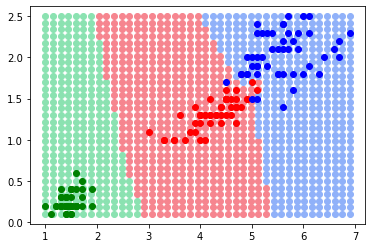

In [63]:
draw_predict_k(convert, 3)